Consider a system where two oscillators which influence each other, such as the her1,7 oscillators in the zebrafish tail. A simplified model is as follows, where $\theta_i$ are the phases of the two oscillators, $\omega_i$ are the natural frequencies, and $\alpha$ is the coupling strength:

$\dot{\theta_1} = \omega_1 + \alpha.sin(\theta_2 - \theta_1)$

$\dot{\theta_2} = \omega_2 + \alpha.sin(\theta_1 - \theta_2)$

a) Combine these two equations into one for the phase difference, $\phi = \theta_2 - \theta_1$

By rearranging the parameters, and nondimensionalizing time (i.e. rescaling time t into a dimensionless variable $T$), you can come up with the following equation: $\frac{d\phi}{dT}= 1 - \mu sin(\phi)$ where $\mu = \frac{2.\alpha}{\omega_2-\omega_1}$

Show the derivation and give an intuitive explanation for the meaning of $\mu$.

In [ ]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

xpixels = 900
ypixels = 600

# get the size in inches
dpi = 72.
xinch = xpixels / dpi
yinch = ypixels / dpi

fig_size = [xinch, yinch]
plt.rcParams["figure.figsize"] = fig_size

$\dot{\theta_1} = \omega_1 + \alpha.sin(\phi)  $

$\dot{\theta_2} = \omega_2 - \alpha.sin(\phi) $

Subtracting (1) from (2)

$\frac{d\phi}{dt} = (\omega_2-\omega_1) -2 \alpha.sin(\phi)$

Dividing by $(\omega_2-\omega_1)$

$\frac{1}{(\omega_2-\omega_1)}\frac{d\phi}{dt} = 1 -\mu.sin(\phi)$

where $\mu = \frac{2\alpha}{\omega_2-\omega_1}$

Non-dimensionlizing time t,

$dt = (\omega_2-\omega_1).dT$

$\frac{d\phi}{dT} = 1 -\mu.sin(\phi)$

b) Since we are considering $\phi$ as a phase, we now restrict our attention to just the interval $[0, 2\pi]$. 
Define $$f(\phi) = \frac{d(\phi)}{dT}(\phi)$$

Plot graphs of $f(\phi)$ for $\mu = 0$, $0 < \mu < 1$, and $\mu > 1$.

Mark stable fixed points with a closed circle and unstable fixed points with an open circle. 

Give an intuitive explanation for what is happening in each case. 

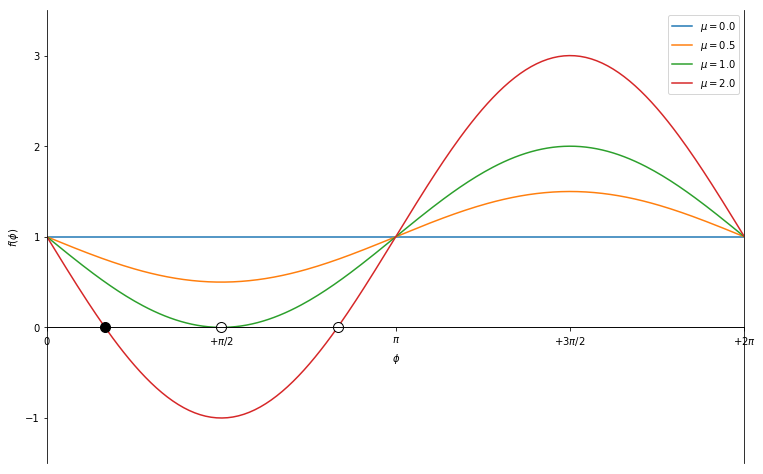

In [3]:
phi = np.linspace(0, 2*np.pi, 256, endpoint=True)
mu = [0, 0.5, 1, 2]

for x in mu:
    f = 1-x*np.sin(phi)
    plt.plot(phi, f, label=r'$\mu=%.1f$'%x)

stableFixedPts = [np.pi/6]
unstableFixedPts = [np.pi/2, 5*np.pi/6]

for stablePt in stableFixedPts:    
    plt.plot(stablePt, 0, 'o', markersize=10,markeredgewidth=1,
             markerfacecolor='k', markeredgecolor='k')
    
for unstablePt in unstableFixedPts: 
    plt.plot(unstablePt, 0, 'o', markersize=10,markeredgewidth=1,
             markerfacecolor='w', markeredgecolor='k')

ax = plt.gca()
ax.xaxis.set_ticks_position('top')
ax.spines['top'].set_position(('data',0))
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

plt.xlabel(r'$\phi$')
plt.ylabel(r'$f(\phi)$')

plt.xlim(0, 2*np.pi)
plt.ylim(-1.5, 3.5)

plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi],
          [r'$0$', r'$+\pi/2$', r'$\pi$', r'$+3\pi/2$', r'$+2\pi$'])

plt.legend(loc='upper right')
plt.show()

Plot the fixed points on the vertical axis as a function of $\mu$. 
Curves corresponding to unstable fixed points should be plotted as a dashed line. 
This is the bifurcation diagram.

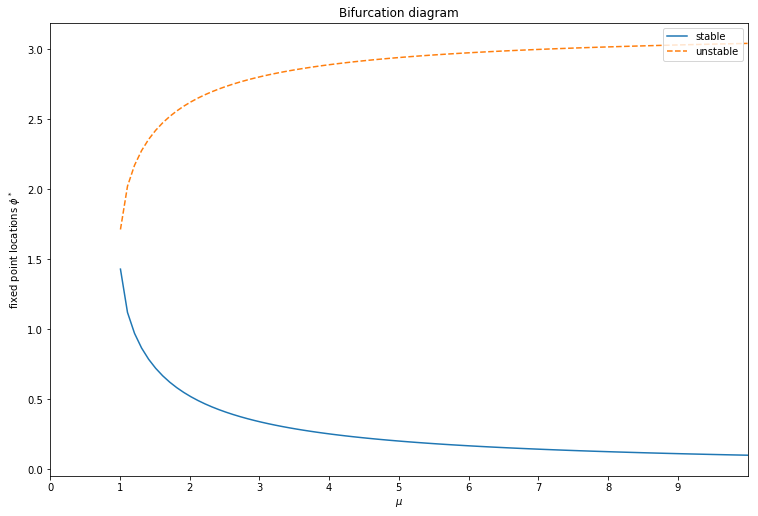

In [24]:
xa = 0
xb = 10

mu = np.linspace(xa, xb, 100, endpoint=True)

stable = []
unstable = []

for p in mu:
    if p == 0.0:
        stable.append(np.nan)
    else:
        phi_star = np.arcsin(1/p)
        
        if 0 <= phi_star < np.pi/2:
            stable.append(phi_star)   
        else:
            stable.append(np.nan) 

for p in mu:
    if p == 0.0:
        unstable.append(np.nan) 
    else:
        phi_star = np.arcsin(1/p)
        
        if 0 <= phi_star < np.pi/2:
            unstable.append(np.pi-phi_star) 
        else:
            if np.pi/2 <= phi_star < np.pi:  
                unstable.append(phi_star) 
            else:
                unstable.append(np.nan) 
    
plt.plot(mu, stable, '-', label='stable')
plt.plot(mu, unstable, '--', label='unstable')

plt.title('Bifurcation diagram')
plt.xlabel(r'$\mu$')
plt.ylabel(r'fixed point locations $\phi^*$')
plt.xlim(xa,xb)

plt.xticks(range(xa,xb))

plt.legend(loc='upper right')
plt.show()

c) Linear stability analysis is a mathematical method (rather than graphical) to determine fixed point stability. By Taylor expanding $f(\phi)$ around a fixed point $\phi^*$ , one can show that a deviation $\delta\phi$ from the fixed point (i.e. $\phi = \phi^∗ + \delta\phi$) has a time-derivative $\frac{d\delta\phi}{dT}$ proportional to $\frac{df}{dT}|_{\phi^*}$

(i) Prove this, and state what one can conclude about stability based on the sign of $\frac{df}{dT}|_{\phi^*}$
(ii) Use this method to show which fixed points from part (b) (left or right) for $\phi$ are stable and which are unstable.

Taylor expansion:

$f(\phi) = f(\phi^*+\delta\phi) = f(\phi^*) + \delta\frac{df}{d\phi*}+O(\delta^2)$

d) Plot $θ_1$ and $θ_2$ on the same axes for the four qualitatively different cases (ie. 4 figures – corresponding to $\mu = 0$, $0 < \mu < 1$, $\mu > 1$, $\mu = \infty$ – with 2 curves each). Assume reasonable initial conditions and parameter values that satisfy
the chosen value of $\mu$. Referencing the original parameters, explain why the behavior of the system changes as it does when $\mu > 1$

$\dot{\theta_1} = \omega_1 + \alpha.sin(\theta_2 − \theta_1)$

$\dot{\theta_2} = \omega_2 + \alpha.sin(\theta_1 − \theta_2)$

$\mu = \frac{2\alpha}{\omega_2-\omega_1}$

${\omega_2-\omega_1} = \frac{2\alpha}{\mu}$


In [106]:
from scipy.integrate import ode

def logistic(t, y, omega, alpha, mu):
    return omega + alpha * np.sin(2*alpha.t/mu)

## mu_range = [0, 0.5, 2, np.infty]

t = 30

mu = 0
omega1=0
omega2=0
alpha=0

# plt.plot(theta1, f1, label=r'$\theta_1$')
# plt.plot(theta2, f2, label=r'$\theta_2$')

backend = 'dopri5'
solver = ode(logistic).set_integrator(backend);

y0=0
t0=0

sol = []
def solout(t, y):
    sol.append([t, *y])
    
solver.set_solout(solout)
solver.set_initial_value(t0, y0).set_f_params(omega1, alpha, mu)
solver.integrate(30)

sol = np.array(sol)
plt.plot(sol[:,0], sol[:,1], 'b.-')

# figure;
# subplot(2, 2, 1);
# plot(t,theta)
# title('phases as func of time, \omega_1=0, \omega_2=0, \alpha=0 (\mu=0)');
# xlabel('time');
# ylabel('\theta (phase)');
# legend('\theta_1', '\theta_2', 'Location', 'Best');    
    
# stableFixedPts = [np.pi/2, np.pi/6 ]
# unstableFixedPts = [5*np.pi/6]

# for stablePt in stableFixedPts:    
#     plt.plot(stablePt, 0, 'o', markersize=10,markeredgewidth=1,
#              markerfacecolor='k', markeredgecolor='k')
# for unstablePt in unstableFixedPts: 
#     plt.plot(unstablePt, 0, 'o', markersize=10,markeredgewidth=1,
#              markerfacecolor='w', markeredgecolor='k')

# ax = plt.gca()
# ax.xaxis.set_ticks_position('top')
# ax.spines['top'].set_position(('data',0))
# ax.xaxis.set_ticks_position('bottom')
# ax.spines['bottom'].set_position(('data',0))
# ax.yaxis.set_ticks_position('left')
# ax.spines['left'].set_position(('data',0))

# plt.xlabel(r'$\phi$')
# plt.ylabel(r'$f(\phi)$')

# plt.xlim(0, 2*np.pi)
# plt.ylim(-1.5, 3.5)

# plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi],
#           [r'$0$', r'$+\pi/2$', r'$\pi$', r'$+3\pi/2$', r'$+2\pi$'])

# plt.legend(loc='upper right')
plt.show()

SyntaxError: invalid syntax (<ipython-input-106-e8b01e1e07de>, line 26)